## Machine Learning Applied in Boston House Pricing
-- Import Library & Load Data

-- Explore Data Analysis

-- Detect outlier and outlier removal

-- Evaluation Metrics & Slipt Train and Test Data

-- Models Comparison

>   *Linear Regression

>   *Ridge Regression

>   *Turned Ridge Regression

>   *Elastic Net Regression

>   *Turned Elastic Net Regression

>   *Random Forest

>   *Recursive Feature Elimination (RFE)

>   *eXtreme Gradient Boosting (XGboost)

>   *Stochastic Gradient Descent (SGD)

-- Bonus: Explain Coefficient of Tuned Elastic Net Regression & Linear Regression


## Import Library & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount("/content/gdrive")
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from matplotlib import pyplot
from numpy import arange
from sklearn.linear_model import ElasticNetCV
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

# load dataset
dataframe = pd.read_csv('/content/gdrive/MyDrive/WeekendProject/BOSTON_HOUSING.csv')#data = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())




(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


## Explore Data Analysis

In [ ]:
# define X and y
#X, y = dataframe[:, :-1], dataframe[:, -1]
X=dataframe[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y=dataframe['MEDV']

dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Variables Description
"""
Independent Variables (X) features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Dependent Variable (y) variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]
"""

"\nIndependent Variables (X) features in order:\n1) CRIM: per capita crime rate by town\n2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.\n3) INDUS: proportion of non-retail business acres per town\n4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]\n6) RM: average number of rooms per dwelling\n7) AGE: proportion of owner-occupied units built prior to 1940\n8) DIS: weighted distances to five Boston employment centres\n9) RAD: index of accessibility to radial highways\n10) TAX: full-value property-tax rate per $10,000 [$/10k]\n11) PTRATIO: pupil-teacher ratio by town\n12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n13) LSTAT: % lower status of the population\n\nDependent Variable (y) variable:\n1) MEDV: Median value of owner-occupied homes in $1000's [k$]\n"

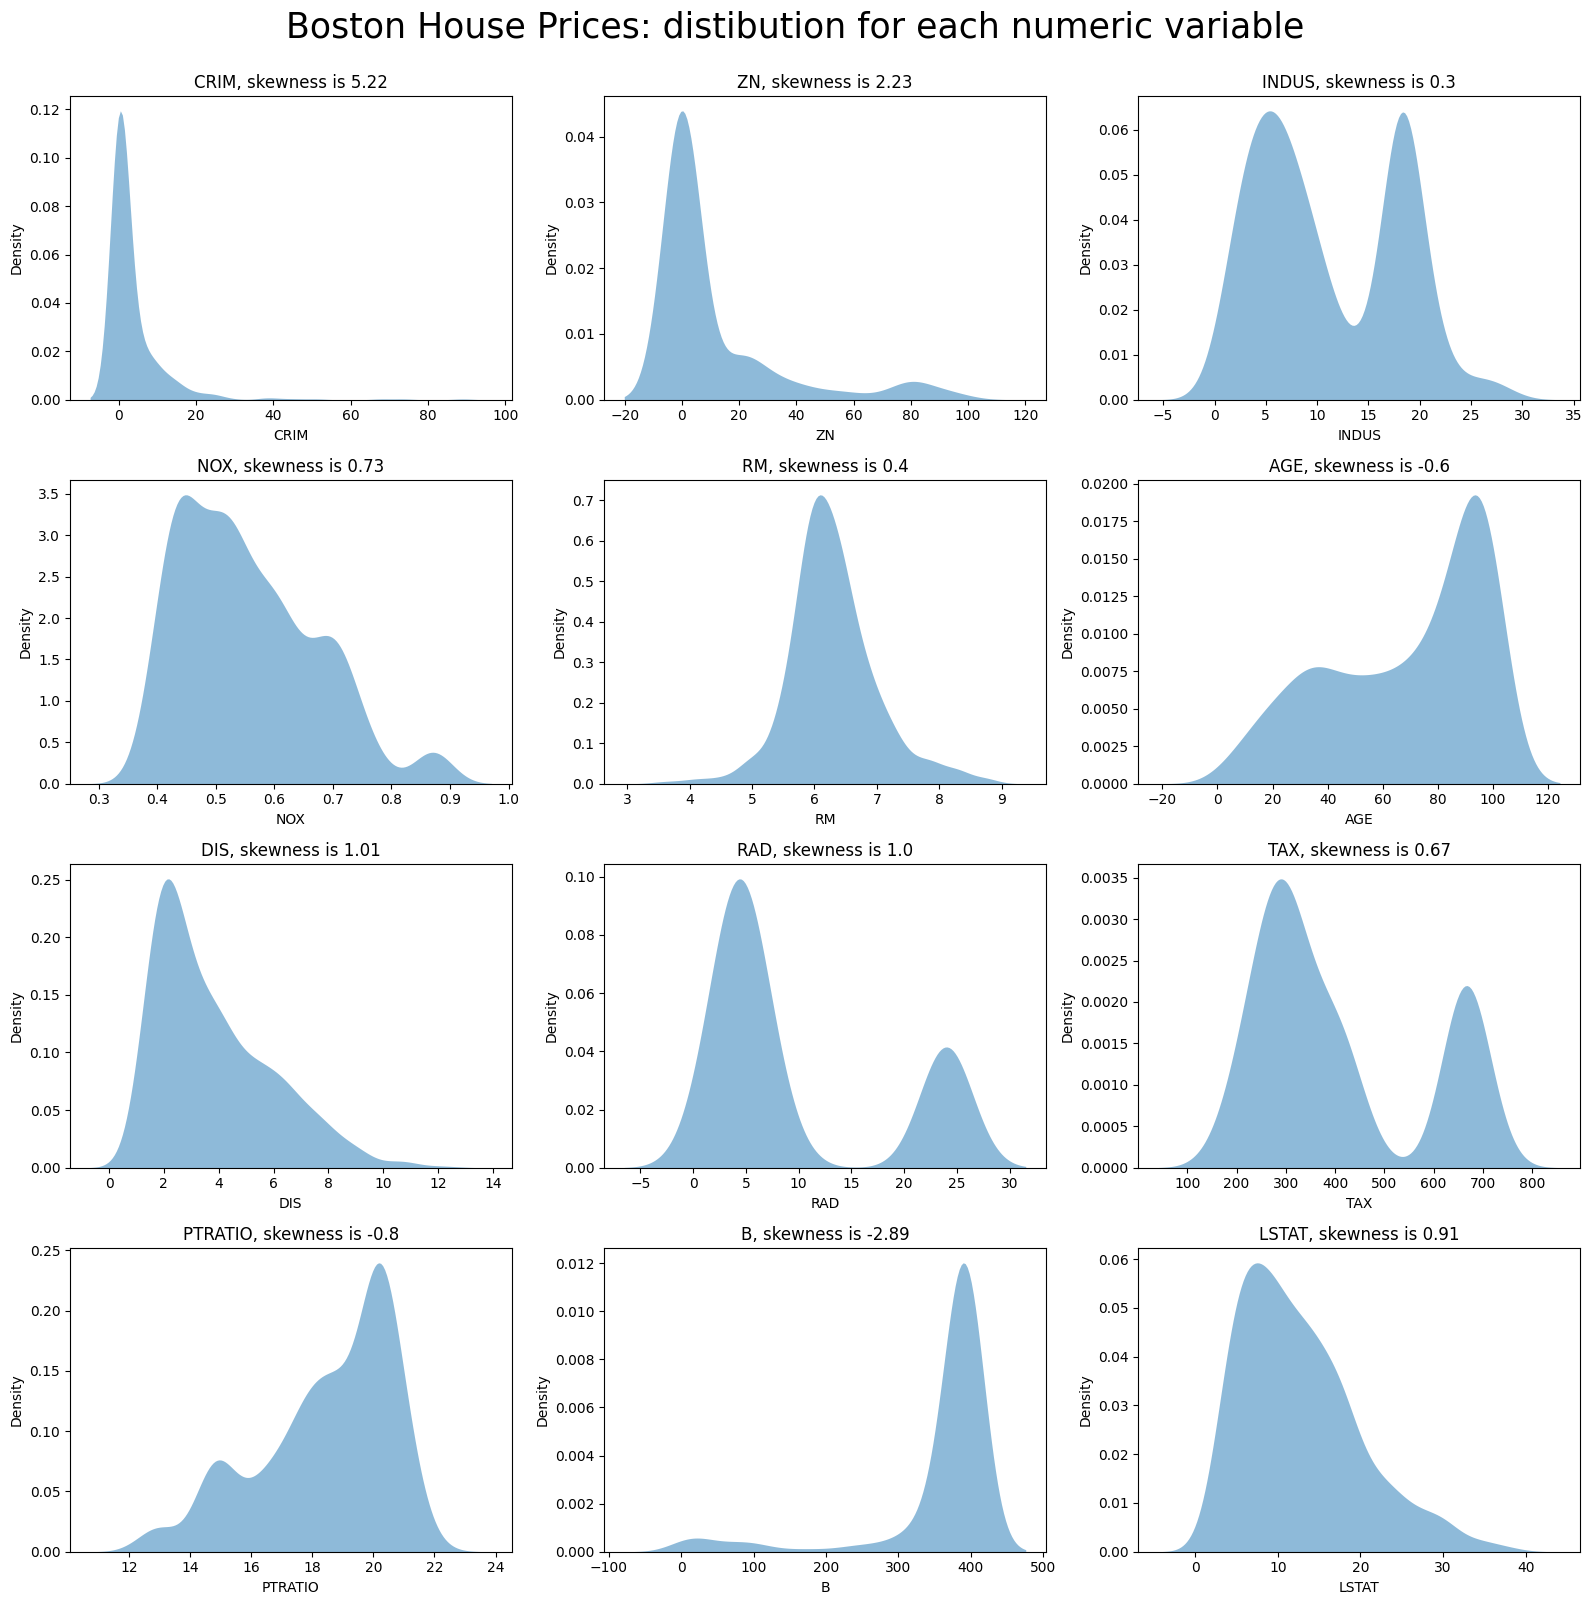

In [ ]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

numeric_columns_boston = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

dist_custom(dataset=dataframe, columns_list=numeric_columns_boston, rows=4, cols=3, suptitle='Boston House Prices: distibution for each numeric variable')
plt.tight_layout()

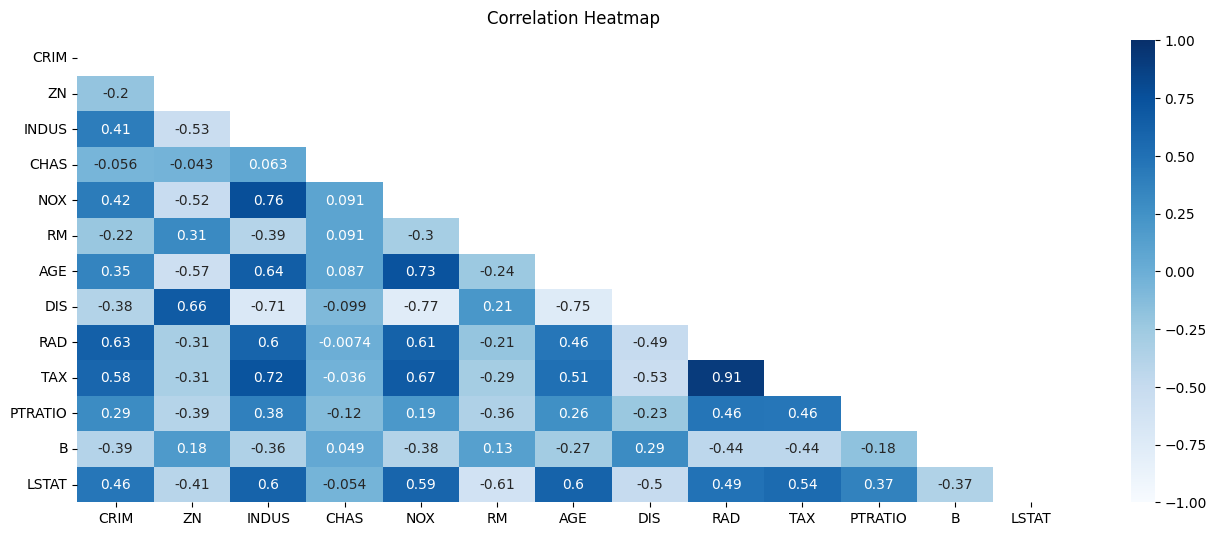

In [ ]:
# Check variable correlations

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
heatmap = sns.heatmap(X.corr(),mask=mask,vmin=-1, vmax=1,annot=True,cmap="Blues")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


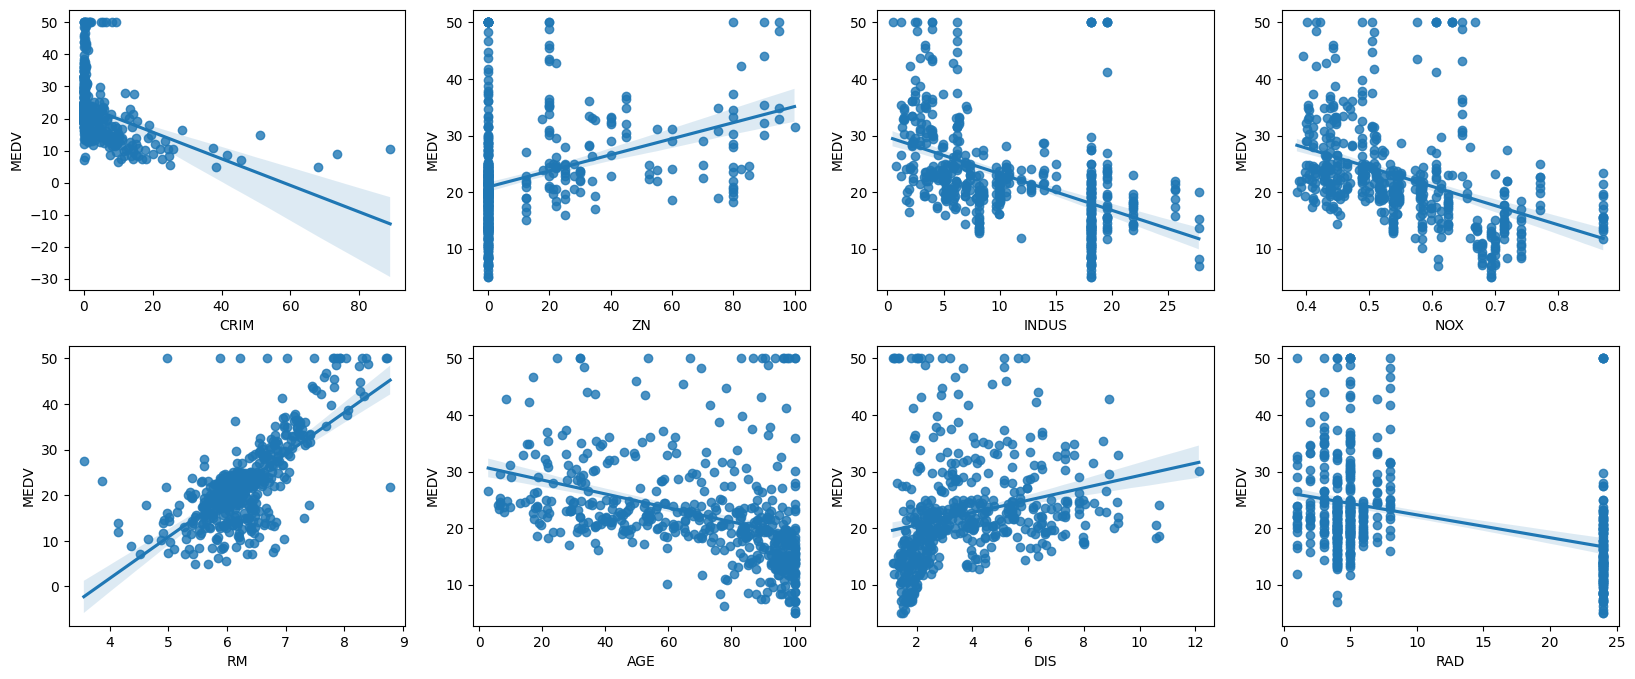

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for col, ax in zip(cols, axs.flat):
  sns.regplot(x = dataframe[col],y = dataframe['MEDV'],ax=ax )

In [ ]:
# Calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

vif_df=pd.DataFrame([vif(X.values,i)
for i in range (X.shape[1])], index=X.columns).reset_index()
vif_df.columns=['feature','vif_score']
vif_df=vif_df.loc[vif_df.feature!='constant']
vif_df

,feature,vif_score
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


In [ ]:
# Drop redundant feature
VIF_X=X.drop(columns=['TAX'])
X=add_constant(VIF_X)
vif_df2=pd.DataFrame([vif(X.values,i)
for i in range(X.shape[1])],
index=X.columns).reset_index()
vif_df2.columns=['feature','vif_score']
vif_df2=vif_df2.loc[vif_df.feature!='const']
vif_df2

,feature,vif_score
0,const,578.263970
1,CRIM,1.791940
2,ZN,2.184240
3,INDUS,3.226015
4,CHAS,1.058220
5,NOX,4.369271
6,RM,1.923075
7,AGE,3.098044
8,DIS,3.954446
9,RAD,2.837494


In [ ]:
# There is a strong correlation between RAD, TAX and INDUS. Especially TAX with other two variable over 0.7.
# Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
# In general, a VIF above 5 indicates high correlation and is cause for concern.
# VIF = 1/1-R2 = 1/Tolerance

## Check outlier by Tukey Rules and outlier removal



In [ ]:
# Check outlier by Tukey Rules and outlier removal
def IQR_method (dataframe,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(dataframe[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(dataframe[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = dataframe[(dataframe[column] < Q1 - outlier_step) | (dataframe[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = dataframe[dataframe[column] < Q1 - outlier_step]
    df2 = dataframe[dataframe[column] > Q3 + outlier_step]

    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])

    return multiple_outliers

In [ ]:
# Outlier removal
numeric_columns2 = ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

Outliers_IQR = IQR_method(dataframe,1,numeric_columns2)
# dropping outliers
df2 = dataframe.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers: 7


## Evaluation Metrics & Slipt Train and Test Data

In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE

    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split

#X = df2.iloc[:, :-1]
#X = X.drop(columns=['TAX'])
#y = df2.iloc[:, -1]

X=dataframe[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO','B','LSTAT']]
y=dataframe['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (dataframe, col_names):
    features = dataframe[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    dataframe[col_names] = features

    return dataframe

In [ ]:
col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

## Models Comparison

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

In [ ]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [ ]:
# Linear Regression Model
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.667342,0.638623,0.685426,4.978692


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.667827,0.639151,0.687129,4.975059


In [ ]:
# Tuned Ridge Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Polynomial features are those features created by raising existing features to an exponent.
# For example, if a dataset had one input feature X,
# then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2.

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)

from sklearn.model_selection import GridSearchCV

alpha_params = [{'model__alpha': list(range(1, 15))}]

trr = GridSearchCV(ridge_pipe, alpha_params, cv = 10)

In [ ]:
steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)

alpha_params = [{'model__alpha': list(range(1, 15))}]

trr = GridSearchCV(ridge_pipe, alpha_params, cv = 10)
# Fit and tune model
trr.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)
# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(trr.best_params_)

{'model__alpha': 12}


In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(trr,X_train,y_train,X_test,y_test,y_pred)]

trr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
trr_score.insert(0, 'Model', 'Tuned Ridge Regression')
trr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.790057,0.771932,0.838579,4.025038


In [ ]:
# Elastic net algorithm

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ElasticNet_model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
ElasticNet_model.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ElasticNet_model.predict(X_test)



In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(ElasticNet_model,X_train,y_train,X_test,y_test,y_pred)]

clf_score1 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score1.insert(0, 'Model', 'Elastic Net Regression')
clf_score1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.770e+03, tolerance: 2.851e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.633e+03, tolerance: 2.650e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Elastic Net Regression,0.667887,0.639215,0.682791,4.974613


In [ ]:
# Automatically configured elastic net algorithm
# The scikit-learn library provides a built-in version of the algorithm that automatically finds good hyperparameters via the ElasticNetCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ElasticNet_model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
ElasticNet_model.fit(X_train, y_train)

Alpha = (ElasticNet_model.alpha_)
L1_ratio=(ElasticNet_model.l1_ratio_)


model_enet = ElasticNet(alpha=Alpha,l1_ratio=L1_ratio)
model_enet.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = model_enet.predict(X_test)

In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(model_enet,X_train,y_train,X_test,y_test,y_pred)]

clf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score.insert(0, 'Model', 'Tuned Elastic Net Regression')
clf_score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.770e+03, tolerance: 2.851e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.633e+03, tolerance: 2.650e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Elastic Net Regression,0.667887,0.639215,0.687211,4.974613


In [ ]:
# XGBoost
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.888355,0.878717,0.855825,2.884268


In [ ]:
# Stochastic Gradient Descent (SGD) -
# Good for large sample dataset eg over 10,000, wrost performance of all models, because of there are only 504 obs here.
from sklearn.linear_model import SGDRegressor

# Create an SGD regression model
SGD = SGDRegressor(loss='epsilon_insensitive', penalty='l2',max_iter=1000) #linear Support Vector Regression

SGD.fit(X_train, y_train)

# Make predictions on the test data
y_pred = SGD.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(SGD,X_train,y_train,X_test,y_test,y_pred)]

SGD_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
SGD_score.insert(0, 'Model', 'SGD')
SGD_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,SGD,0.665645,0.63678,0.67113,4.991374


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.838026,0.824043,0.80939,3.474074


In [ ]:
# Recursive Feature Elimination (RFE)
#RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features.

# Random Forest has usually good performance combining with RFE

from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

rf_pipeline.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train,y_train,X_test,y_test,y_pred)]

rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.843441,0.829925,0.818928,3.415505


In [ ]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=7)

# Fit the model to the training data
DTR.fit(X_train, y_train)

# Make predictions on the test data
y_pred = DTR.predict(X_test)

ndf = [Reg_Models_Evaluation_Metrics(DTR,X_train,y_train,X_test,y_test,y_pred)]

DTR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
DTR_score.insert(0, 'Model', 'Random Forest with RFE')
DTR_score


,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.739256,0.716746,0.675371,4.407812


In [ ]:
result = pd.concat([lm_score,rr_score,trr_score,clf_score, clf_score1,XGBR_score,SGD_score,rf_score,rfe_score], ignore_index=True, sort=False)
result

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.667342,0.638623,0.685426,4.978692
1,Ridge Regression,0.667827,0.639151,0.687129,4.975059
2,Tuned Ridge Regression,0.790057,0.771932,0.838579,4.025038
3,Tuned Elastic Net Regression,0.667887,0.639215,0.687211,4.974613
4,Elastic Net Regression,0.667887,0.639215,0.682791,4.974613
5,XGBoost,0.888355,0.878717,0.855825,2.884268
6,SGD,0.665645,0.636780,0.671130,4.991374
7,Random Forest,0.838026,0.824043,0.809390,3.474074
8,Random Forest with RFE,0.843441,0.829925,0.818928,3.415505


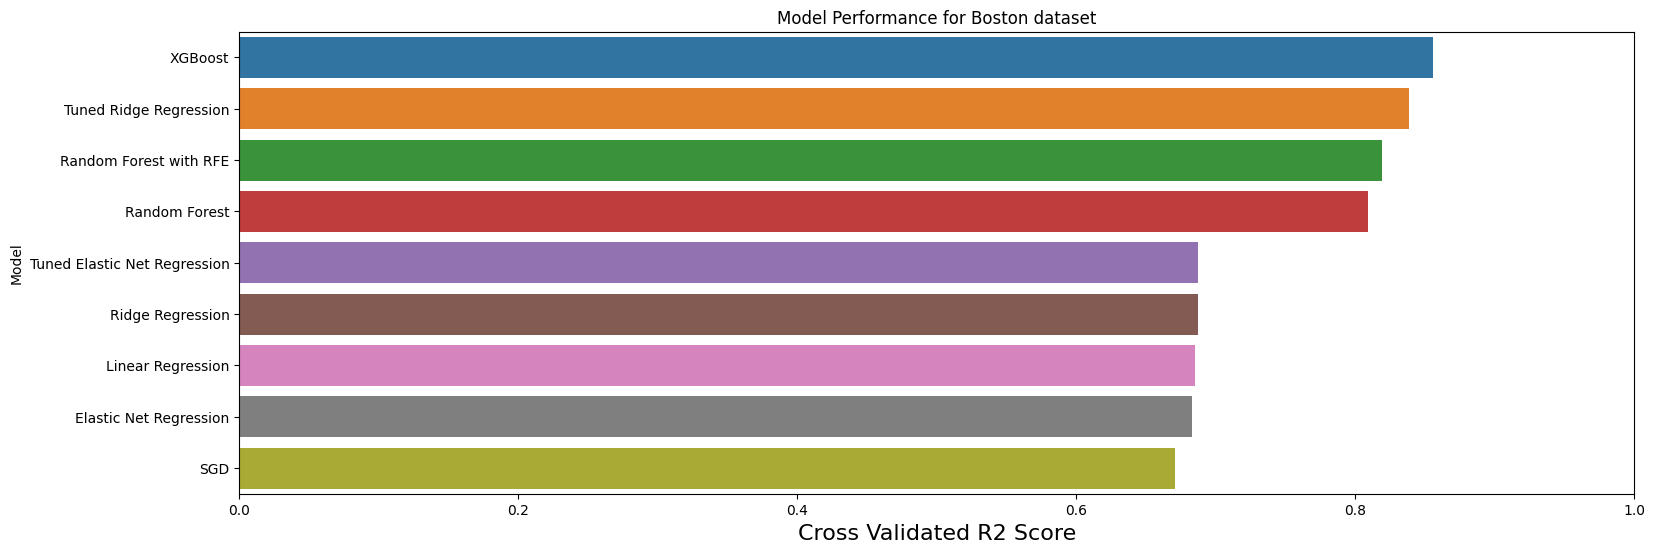

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set(title='Model Performance for Boston dataset')

plt.show()



Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validated R2 is a median value or R2 taken from cross-validation procedure.



## Bonus: Coefficient of Tuned Elastic Net Regression & Linear Regression

In [ ]:
# SLR Coefficient

import statsmodels.api as sm

regression = LinearRegression()
regression.fit(X, y)

SLR_coef_pval_dict = {}

# Add coefficients and p-values to the dictionary
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept)
results = model.fit()

for feat, coef, pval in zip(X.columns, regression.coef_, results.pvalues[1:]):
    SLR_coef_pval_dict[feat] = {'coef': coef, 'p-value': pval}

SLR_coef_pval_dict

{'CRIM': {'coef': -0.10673392444454452, 'p-value': 0.0013843203435984915},
 'ZN': {'coef': 0.03637070608198964, 'p-value': 0.0073539151164841105},
 'INDUS': {'coef': -0.06777825486548512, 'p-value': 0.22531732818446093},
 'CHAS': {'coef': 3.029231357586518, 'p-value': 0.0004937662851961894},
 'NOX': {'coef': -18.701212492639346, 'p-value': 1.5669764040393753e-06},
 'RM': {'coef': 3.9116902413977077, 'p-value': 4.782220069059231e-19},
 'AGE': {'coef': -0.000605404548898375, 'p-value': 0.9638041329212795},
 'DIS': {'coef': -1.4883026886041666, 'p-value': 6.310048410981619e-13},
 'RAD': {'coef': 0.13457565440380176, 'p-value': 0.0011822602261632375},
 'PTRATIO': {'coef': -0.9851285818883745, 'p-value': 3.481821893136956e-13},
 'B': {'coef': 0.009546436584361925, 'p-value': 0.0004702127555185376},
 'LSTAT': {'coef': -0.5222095302541666, 'p-value': 2.7617025251977955e-22}}

In [ ]:
# Elastic Net regrssion coefficient
elastic=ElasticNet( alpha=Alpha, l1_ratio=L1_ratio)
elastic.fit(X, y)
Elastic_coef_dict={}
for coef, feat in zip(elastic.coef_,X.columns):
    Elastic_coef_dict[feat] = coef
Elastic_coef_dict

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.934e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


{'CRIM': -0.10009211791047214,
 'ZN': 0.03775708549231533,
 'INDUS': -0.13729301148617767,
 'CHAS': 2.547134187657497,
 'NOX': -4.390541824236032,
 'RM': 3.9290304932142845,
 'AGE': -0.012446806677619115,
 'DIS': -1.2781827544285602,
 'RAD': 0.08670196063500601,
 'PTRATIO': -0.8375450344053966,
 'B': 0.010298858267262715,
 'LSTAT': -0.5464247279309551}

## Coefficient Explaination - considering the corresponding coefficients from the Elastic Net regression model

CRIM (per capita crime rate by town): For every unit increase in the per capita crime rate, the median value of owner-occupied homes is estimated to decrease by approximately $0.10k.

ZN (proportion of residential land zoned for lots over 25,000 sq.ft.): For every unit increase in the proportion of residential land zoned for large lots, the median value of owner-occupied homes is estimated to increase by approximately $0.04k.

INDUS (proportion of non-retail business acres per town): For every unit increase in the proportion of non-retail business acres, the median value of owner-occupied homes is estimated to decrease by approximately $0.14k.

CHAS (Charles River dummy variable): If a town's tract bounds the Charles River (CHAS=1), the median value of owner-occupied homes is estimated to increase by approximately $2.55k compared to towns that don't have river boundaries.

NOX (nitric oxides concentration): For every unit increase in the nitric oxides concentration, the median value of owner-occupied homes is estimated to decrease by approximately $4.39k.

RM (average number of rooms per dwelling): For every additional room, the median value of owner-occupied homes is estimated to increase by approximately $3.93k.

AGE (proportion of owner-occupied units built prior to 1940): For every unit increase in the proportion of older owner-occupied units, the median value of owner-occupied homes is estimated to decrease by approximately $0.01k.

DIS (weighted distances to five Boston employment centers): For every unit increase in the weighted distances to employment centers, the median value of owner-occupied homes is estimated to decrease by approximately $1.28k.

RAD (index of accessibility to radial highways): For every unit increase in the index of accessibility to highways, the median value of owner-occupied homes is estimated to increase by approximately $0.09k.

PTRATIO (pupil-teacher ratio by town): For every unit increase in the pupil-teacher ratio, the median value of owner-occupied homes is estimated to decrease by approximately $0.84k.

B (proportion of blacks by town): For every unit increase in the proportion of black residents, the median value of owner-occupied homes is estimated to increase by approximately $0.01k.

LSTAT (% lower status of the population): For every unit increase in the percentage of lower-status population, the median value of owner-occupied homes is estimated to decrease by approximately $0.55k.